In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fontSize = 20
legendSize = 20


In [46]:
# fontSize = 20
# legendSize = 20

# # Read data from load_socialnetwork-kn.csv to dataframe
# df = pd.read_csv('../data/06071509/load_ratefile.csv', sep=',')
# # drop the column "type"
# df = df.drop(columns=['type'])
# # filter code == 200
# df = df[df['code'] == 200]
# # drop the column "code"
# df = df.drop(columns=['code'])
# # add a new column "latency" equal to (end - start)
# df['latency'] = df['end'] - df['start']
# # df = df[df['latency'] < 50]
# # drop the column "end"
# df = df.drop(columns=['end'])
# # sort by start in ascending order
# df = df.sort_values(by=['start'])
# # group requests in 1s and calculate the mean of latency
# df = df.groupby(pd.cut(df['start'], np.arange(df['start'].min(), df['start'].max(), 5000))).mean()
# # reindex by 0,1,2,3..
# df = df.reset_index(drop=True)
# # drop the start column
# df = df.drop(columns=['start'])
# # use matplotlib to plot the graph
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(df['latency'], color='blue', label="latency")
# ax.set_xlabel('Time (s)', fontsize=fontSize)
# ax.set_ylabel('Latency (ms)', fontsize=fontSize)
# ax.tick_params(axis='both', labelsize=20)
# ax.legend(loc='upper left', fontsize=legendSize)
# # save fig to ./figures/load_kn.pdf
# # fig.savefig('./figures/load_kn.pdf', bbox_inches='tight')
# plt.show()
# # plt.close()


In [48]:
# fontSize = 20
# legendSize = 20

# fig, ax = plt.subplots(figsize=(5, 5))

# file = ['06082216', '06090003', '06090035']
# label = ['Microless -bundle -DCC', 'Microless -DCC', 'Microless']

# for i in range(len(file)):
#     df = pd.read_csv(f'../data/{file[i]}/load_q1500.csv')
#     df = df[df['code'] == 200]
#     df = df.drop(columns=['code'])
#     df['latency'] = df['end'] - df['start']
#     # draw cdf of df['latency'] in line plot
#     ax.plot(
#         np.sort(df['latency']),
#         np.arange(1, len(df['latency']) + 1) / len(df['latency']),
#         # color='blue',
#         label=label[i]
#     )

# ax.set_xlabel('Latency (ms)', fontsize=fontSize)
# ax.set_ylabel('CDF', fontsize=fontSize)
# # set xlim and ylim
# ax.set_xlim(0, 1000)
# ax.set_ylim(0, 1)
# ax.tick_params(axis='both', labelsize=20)
# ax.legend(loc='lower right', fontsize=legendSize)
# plt.show()

108.9712662725542
76.51007654264423
50.09191214739253
16.597963763826037


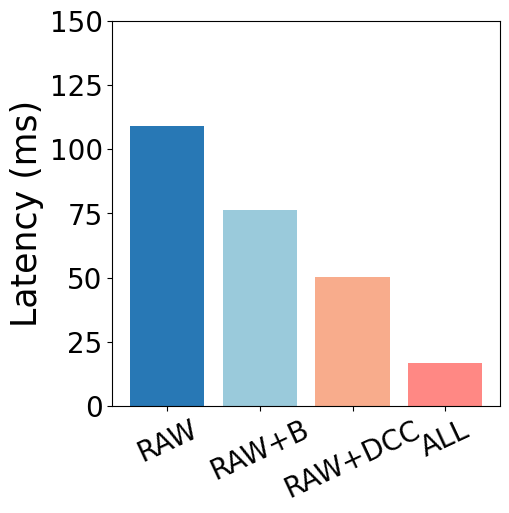

In [196]:
file = ['06082216', '06090003', '06091013', '06090035']
label = ['RAW', 'RAW+B', 'RAW+DCC', 'ALL']

fig, ax = plt.subplots(figsize=(5, 5))
color = [
    '#2878b5',
    '#9acadb',
    '#f8ac8c',
    '#ff8884'
]

for i in range(len(file)):
    df = pd.read_csv(f'../data/{file[i]}/load_q1500.csv')
    df = df[df['code'] == 200]
    df = df.drop(columns=['code'])
    df['latency'] = df['end'] - df['start']
    # draw box plot at x=i
    print(df['latency'].mean())
    ax.bar(i, df['latency'].mean(), capsize=5, label=label[i], color=color[i])
    # ax.boxplot(df['latency'], positions=[i], showfliers=False, widths=0.5, whis=[5, 95])

# set x, y lim
ax.set_ylim(0, 150)

ax.set_ylabel('Latency (ms)', fontsize=25)
# set xticks as label
ax.set_xticks(list(range(len(file))))
ax.set_xticklabels(label)
ax.tick_params(axis='x', labelsize=20, rotation=25)
ax.tick_params(axis='y', labelsize=20)
fig.savefig('./ablationLatency.pdf', bbox_inches='tight')
plt.show()

In [40]:
# not use
# file = ['06082216', '06090003', '06091013', '06090035']
# label = ['-B-DCC', '-DCC', '-B', 'All']

# fig, ax = plt.subplots(figsize=(5, 5))

# for i in range(len(file)):
#     df = pd.read_csv(f'../data/{file[i]}/load_q1500.csv')
#     df = df[df['code'] == 200]
#     df = df.drop(columns=['code'])
#     df['latency'] = df['end'] - df['start']
#     # draw box plot at x=i
#     ax.bar(i, df['latency'].quantile(0.95), label=label[i])
#     # ax.boxplot(df['latency'], positions=[i], showfliers=False, widths=0.5, whis=[5, 95])

# # set x, y lim
# ax.set_ylim(0, 1000)

# ax.set_ylabel('Latency (ms)', fontsize=fontSize)
# # set xticks as label
# ax.set_xticks(list(range(len(file))))
# ax.set_xticklabels(label)
# ax.tick_params(axis='both', labelsize=20)
# plt.show()

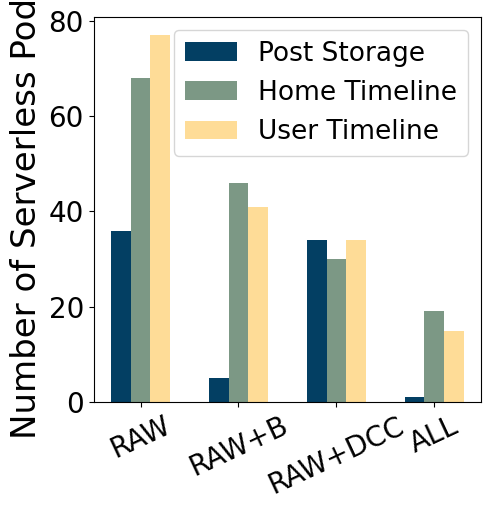

In [201]:
label = ['RAW', 'RAW+B', 'RAW+DCC', 'ALL']

fig, ax = plt.subplots(figsize=(5, 5))

poststorage = [36, 5, 34, 1]
hometimeline = [68, 46, 30, 19]
usertimeline = [77, 41, 34, 15]

ax.bar(
    np.arange(len(label)) - 0.2,
    poststorage,
    width=0.2,
    color='#033F63',
    label='Post Storage'
)
ax.bar(
    np.arange(len(label)),
    hometimeline,
    width=0.2,
    color='#7C9885',
    label='Home Timeline'
)
ax.bar(
    np.arange(len(label)) + 0.2,
    usertimeline,
    width=0.2,
    color='#FEDC97',
    label='User Timeline'
)

ax.set_ylabel('Number of Serverless Pods', fontsize=24.5)
# set xticks as label
ax.set_xticks(list(range(len(file))))
ax.set_xticklabels(label)
ax.tick_params(axis='x', labelsize=20, rotation=25)
ax.tick_params(axis='y', labelsize=20)
ax.legend(loc='upper right', fontsize=19)
fig.savefig('./ablationPods.pdf', bbox_inches='tight')
plt.show()


In [49]:
# # file = ['06071108', '06071726', '06051616', '06071509']
# # label = ['microless', 'kube', 'kn', 'amoeba']

# file = ['06071726', '06051616', '06071509', '06081509']
# label = ['K8s', 'KNative', 'Amoeba', 'Microless']

# fig, ax = plt.subplots(figsize=(5, 5))

# for i in range(len(file)):
#     df = pd.read_csv(f'../data/{file[i]}/load_ratefile.csv')
#     df = df[df['code'] == 200]
#     df = df.drop(columns=['code'])
#     df['latency'] = df['end'] - df['start']
#     # draw box plot at x=i
#     ax.boxplot(df['latency'], positions=[i], showfliers=False, widths=0.5, whis=[5, 99])

# # set x, y lim
# ax.set_ylim(2, 100)
# ax.set_xlim(-0.5, 3.5)

# ax.set_ylabel('Latency (ms)', fontsize=fontSize)
# # set xticks as label
# ax.set_xticks([0, 1, 2, 3])
# ax.set_xticklabels(label)
# ax.tick_params(axis='both', labelsize=15)
# plt.show()

In [50]:
# fig, ax = plt.subplots(figsize=(5, 5))

# df = pd.read_csv('../data/06021417/load_q100.csv')
# df = df[df['code'] == 200]
# df = df.drop(columns=['code'])
# df['latency'] = df['end'] - df['start']
# ax.boxplot(df['latency'], positions=[0], showfliers=False, widths=0.5, whis=[5, 95])

# df = pd.read_csv('../data/06021425/load_q100.csv')
# df = df[df['code'] == 200]
# df = df.drop(columns=['code'])
# df['latency'] = df['end'] - df['start']
# ax.boxplot(df['latency'], positions=[1], showfliers=False, widths=0.5, whis=[5, 95])

# ax.set_ylabel('Latency (ms)', fontsize=fontSize)
# # set xticks as label
# ax.set_xticks([0, 1])
# ax.set_xticklabels(['VM', "Serverless"])
# ax.tick_params(axis='both', labelsize=15)
# plt.show()

In [164]:
# vm side
folder = '06100111'
qps = [100, 200, 300, 400, 500, 600, 700, 800]
homep = 'home-timeline-756785bd77-wnxpf'
userp = 'user-timeline-5bb5d6d7f8-ckvb9'
postp = 'post-storage-7945859c6b-k6grn'

# vmlat = []
vmhometimelinecpu = []
vmusertimelinecpu = []
vmpoststoragecpu = []
vmhometimelinemem = []
vmusertimelinemem = []
vmpoststoragemem = []
cpudf = pd.read_csv(f'../data/{folder}/cpu.csv')
memdf = pd.read_csv(f'../data/{folder}/mem.csv')
mb = 1024*1024
for q in qps:
    df = pd.read_csv(f'../data/{folder}/load_q{q}_user.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    cpu = cpudf[cpudf['Time'] < end]
    cpu = cpu[cpu['Time'] > start]
    # vmhometimelinecpu.append(cpu[homep].mean())
    vmusertimelinecpu.append(cpu[userp].mean())
    vmpoststoragecpu.append(cpu[postp].mean())

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    # vmhometimelinemem.append(mem[homep].mean()/mb)
    vmusertimelinemem.append(mem[userp].mean()/mb)
    vmpoststoragemem.append(mem[postp].mean()/mb)

    df = pd.read_csv(f'../data/{folder}/load_q{q}_home.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    cpu = cpudf[cpudf['Time'] < end]
    cpu = cpu[cpu['Time'] > start]
    vmhometimelinecpu.append(cpu[homep].mean())

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    vmhometimelinemem.append(mem[homep].mean()/mb)
    # vmusertimelinemem.append(mem[userp].mean()/mb)
    # vmpoststoragemem.append(mem[postp].mean()/mb)

# microless side
folder = '06092151'
homep = 'home-timeline-vm-6dcbd9b588-wwvj5'
userp = 'user-timeline-vm-6bcd8b75b4-bgfm2'
postp = 'post-storage-vm-85745c475f-k6fdk'

# mllat = []
mlhometimelinecpu = []
mlusertimelinecpu = []
mlpoststoragecpu = []
mlhometimelinemem = []
mlusertimelinemem = []
mlpoststoragemem = []
cpudf = pd.read_csv(f'../data/{folder}/cpu.csv')
memdf = pd.read_csv(f'../data/{folder}/mem.csv')
mb = 1024*1024
for q in qps:
    df = pd.read_csv(f'../data/{folder}/load_q{q}_user.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    cpu = cpudf[cpudf['Time'] < end]
    cpu = cpu[cpu['Time'] > start]
    # mlhometimelinecpu.append(cpu[homep].mean())
    mlusertimelinecpu.append(cpu[userp].mean())
    mlpoststoragecpu.append(cpu[postp].mean())

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    # mlhometimelinemem.append(mem[homep].mean()/mb)
    mlusertimelinemem.append(mem[userp].mean()/mb)
    mlpoststoragemem.append(mem[postp].mean()/mb)

    df = pd.read_csv(f'../data/{folder}/load_q{q}_home.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    cpu = cpudf[cpudf['Time'] < end]
    cpu = cpu[cpu['Time'] > start]
    mlhometimelinecpu.append(cpu[homep].mean())
    # mlusertimelinecpu.append(cpu[userp].mean())
    # mlpoststoragecpu.append(cpu[postp].mean())

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    mlhometimelinemem.append(mem[homep].mean()/mb)
    # mlusertimelinemem.append(mem[userp].mean()/mb)
    # mlpoststoragemem.append(mem[postp].mean()/mb)

# calculate overhead
# latr = np.asarray(mllat) / np.asarray(vmlat)
mlhometimelinecpu = np.asarray(mlhometimelinecpu)
vmhometimelinecpu = np.asarray(vmhometimelinecpu)
mlusertimelinecpu = np.asarray(mlusertimelinecpu)
vmusertimelinecpu = np.asarray(vmusertimelinecpu)
mlpoststoragecpu = np.asarray(mlpoststoragecpu)
vmpoststoragecpu = np.asarray(vmpoststoragecpu)
mlhometimelinemem = np.asarray(mlhometimelinemem)
vmhometimelinemem = np.asarray(vmhometimelinemem)
mlusertimelinemem = np.asarray(mlusertimelinemem)
vmusertimelinemem = np.asarray(vmusertimelinemem)
mlpoststoragemem = np.asarray(mlpoststoragemem)
vmpoststoragemem = np.asarray(vmpoststoragemem)

hometimelinecpur = (mlhometimelinecpu - vmhometimelinecpu) / mlhometimelinecpu
usertimelinecpur = (mlusertimelinecpu - vmusertimelinecpu) / mlusertimelinecpu
poststoragecpur = (mlpoststoragecpu - vmpoststoragecpu) / mlpoststoragecpu
hometimelinememr = (mlhometimelinemem - vmhometimelinemem) / mlhometimelinemem
usertimelinememr = (mlusertimelinemem - vmusertimelinemem) / mlusertimelinemem
poststoragememr = (mlpoststoragemem - vmpoststoragemem) / mlpoststoragemem

print(mlhometimelinecpu)
print(vmhometimelinecpu)
print(hometimelinecpur)
# print(usertimelinecpur)
# print(poststoragecpur)

[0.08916236 0.17210603 0.25201994 0.31840463 0.39856078 0.46515048
 0.53319647 0.5447403 ]
[0.19987707 0.24330435 0.27680635 0.32268007 0.37510332 0.66173061
 0.56103284 0.5672913 ]
[-1.24172029 -0.41368875 -0.09835098 -0.01342768  0.0588554  -0.42261621
 -0.05220659 -0.0413977 ]


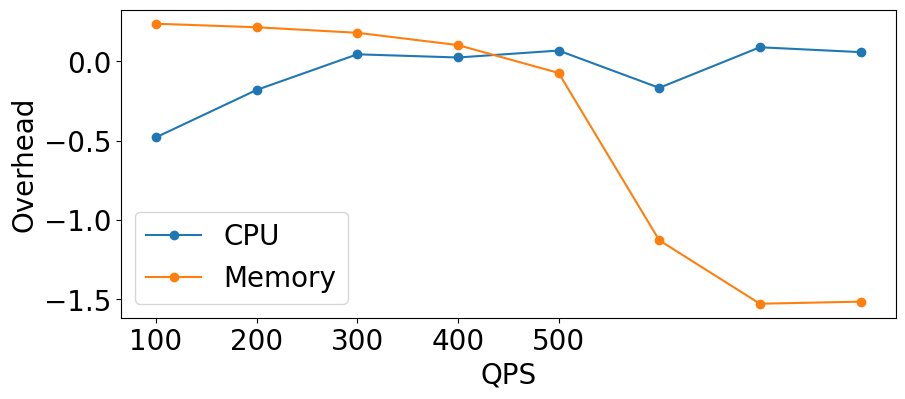

In [162]:
# plot
fig, ax = plt.subplots(figsize=(10, 4))

# ax.plot(qps, latr, label='latency', marker='o')
cpur = (hometimelinecpur + usertimelinecpur + poststoragecpur) / 3
memr = (hometimelinememr + usertimelinememr + poststoragememr) / 3
ax.plot(qps, cpur, label='CPU', marker='o')
ax.plot(qps, memr, label='Memory', marker='o')

ax.set_xlabel('QPS', fontsize=fontSize)
ax.set_ylabel('Overhead', fontsize=fontSize)
ax.tick_params(axis='both', labelsize=20)
ax.set_xticks([100, 200, 300, 400, 500])
ax.set_xticklabels([100, 200, 300, 400, 500])
ax.legend(fontsize=20)
plt.savefig('overhead.pdf', bbox_inches='tight')
plt.show()


In [125]:
# print(mllat)
# print(vmlat)
# print(latr)

# print(mlhometimelinecpu)
# print(vmhometimelinecpu)
# print(hometimelinecpur)

# print(mlusertimelinecpu)
# print(vmusertimelinecpu)
# print(usertimelinecpur)

# print(mlpoststoragecpu)
# print(vmpoststoragecpu)
# print(poststoragecpur)

print(mlhometimelinemem)
print(vmhometimelinemem)
print(hometimelinememr)

print(mlusertimelinemem)
print(vmusertimelinemem)
print(usertimelinememr)

print(mlpoststoragemem)
print(vmpoststoragemem)
print(poststoragememr)

[17.862079326923077, 18.95342548076923, 17.934988839285715, 20.473858173076923, 24.058035714285715]
[17.79627403846154, 18.702566964285715, 18.670072115384617, 18.98407451923077, 18.831194196428573]
[1.0036977  1.01341305 0.96062772 1.07847544 1.27756293]
[16.250901442307693, 18.35907451923077, 18.560267857142858, 21.899338942307693, 25.178292410714285]
[17.194110576923077, 20.241908482142858, 20.318209134615383, 18.768028846153847, 18.723214285714285]
[0.94514348 0.90698338 0.91347952 1.16684278 1.34476335]
[17.052283653846153, 17.622596153846153, 19.720982142857142, 20.204026442307693, 24.628069196428573]
[13.893930288461538, 16.867466517857142, 17.432692307692307, 19.662560096153847, 18.44140625]
[1.22731893 1.04476841 1.13126428 1.02753794 1.33547675]


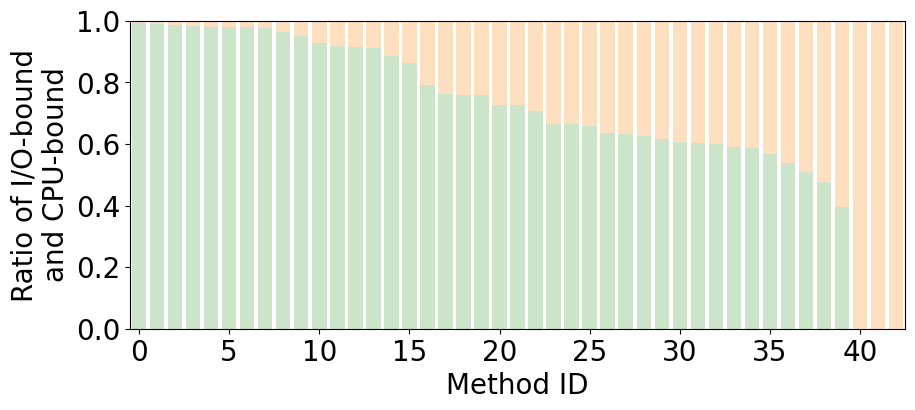

In [158]:
r = [
    0.9940,
    0.9882,
    0.9870,
    0.9838,
    0.9805,
    0.9801,
    0.9797,
    0.9755,
    0.9650,
    0.9510,
    0.9280,
    0.9183,
    0.9134,
    0.9125,
    0.8839,
    0.8621,
    0.7917,
    0.7606,
    0.7580,
    0.7574,
    0.7262,
    0.7248,
    0.7077,
    0.6647,
    0.6631,
    0.6567,
    0.6363,
    0.6333,
    0.6270,
    0.6163,
    0.6057,
    0.6031,
    0.5989,
    0.5893,
    0.5855,
    0.5668,
    0.5385,
    0.5077,
    0.4759,
    0.3956,
    0, 0, 0
]
r = np.asarray(r)
rr = 1 - r

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(range(0, len(r)), r, color='#CCE4CA')
ax.bar(range(0, len(r)), rr, bottom=r, color='#FEE0C1')
ax.set_xlabel('Method ID', fontsize=fontSize)
ax.set_ylabel('Ratio of I/O-bound\nand CPU-bound', fontsize=fontSize)
ax.tick_params(axis='both', labelsize=20)

ax.set_xlim(-0.5, len(r)-0.5)
ax.set_ylim(0, 1)

# ax.set_xticks(range(0, len(r)))
# ax.set_xticklabels(range(1, len(r)+1))
plt.savefig('io.pdf', bbox_inches='tight')
plt.show()


In [183]:
folder = '06091039'
qps = [100, 200, 300, 400, 500]
homep = 'home-timeline-5c4d9b8f46-zkjrm'
userp = 'user-timeline-8655ff8647-nb9pk'
postp = 'post-storage-5676c7c95f-s6h5f'

vmhometimelinemem = []
vmusertimelinemem = []
vmpoststoragemem = []
cpudf = pd.read_csv(f'../data/{folder}/cpu.csv')
memdf = pd.read_csv(f'../data/{folder}/mem.csv')
mb = 1024*1024
for q in qps:
    df = pd.read_csv(f'../data/{folder}/load_q{q}.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    vmhometimelinemem.append(mem[homep].mean()/mb)
    vmusertimelinemem.append(mem[userp].mean()/mb)
    vmpoststoragemem.append(mem[postp].mean()/mb)

folder = '06091429'
homep = 'home-timeline-vm-5dc5878568-7sth7'
userp = 'user-timeline-vm-f586bfc5b-9rtmr'
postp = 'post-storage-vm-866d6dbbdf-6cstj'

mlhometimelinemem = []
mlusertimelinemem = []
mlpoststoragemem = []
cpudf = pd.read_csv(f'../data/{folder}/cpu.csv')
memdf = pd.read_csv(f'../data/{folder}/mem.csv')
mb = 1024*1024
for q in qps:
    df = pd.read_csv(f'../data/{folder}/load_q{q}.csv')
    df = df[df['code'] == 200]
    start = df['start'].min()
    end = df['end'].max()

    mem = memdf[memdf['Time'] < end]
    mem = mem[mem['Time'] > start]
    mlhometimelinemem.append(mem[homep].mean()/mb)
    mlusertimelinemem.append(mem[userp].mean()/mb)
    mlpoststoragemem.append(mem[postp].mean()/mb)

vmhometimelinemem = np.asarray(vmhometimelinemem)
vmusertimelinemem = np.asarray(vmusertimelinemem)
vmpoststoragemem = np.asarray(vmpoststoragemem)
mlhometimelinemem = np.asarray(mlhometimelinemem)
mlusertimelinemem = np.asarray(mlusertimelinemem)
mlpoststoragemem = np.asarray(mlpoststoragemem)

print(vmhometimelinemem)
print(vmusertimelinemem)
print(vmpoststoragemem)
print(mlhometimelinemem)
print(mlusertimelinemem)
print(mlpoststoragemem)

hometimelinememr = (mlhometimelinemem - vmhometimelinemem) / mlhometimelinemem
usertimelinememr = (mlusertimelinemem - vmusertimelinemem) / mlusertimelinemem
poststoragememr = (mlpoststoragemem - vmpoststoragemem) / mlpoststoragemem

memr = (hometimelinememr + usertimelinememr + poststoragememr) / 3
print(memr)

[18.12304688 18.70256696 18.67007212 18.98407452 18.8311942 ]
[17.41080729 20.24190848 20.31820913 18.76802885 18.72321429]
[14.28450521 16.86746652 17.43269231 19.6625601  18.44140625]
[17.86207933 18.95342548 17.93498884 20.47385817 24.05803571]
[16.25090144 18.35907452 18.56026786 21.89933894 25.17829241]
[17.05228365 17.62259615 19.72098214 20.20402644 24.6280692 ]
[ 0.0254421  -0.01549015 -0.00655601  0.08085053  0.24161272]
